# Multi Layer Perceptron Model 9 : **crypto-currency-bitcoin-and-ethereum Dataset**:

In [44]:
# Dataset from Kaggle
!kaggle datasets download -d zsinghrahulk/crypto-currency-bitcoin-and-ethereum-data

Dataset URL: https://www.kaggle.com/datasets/zsinghrahulk/crypto-currency-bitcoin-and-ethereum-data
License(s): CC0-1.0
  0% 0.00/117k [00:00<?, ?B/s]
100% 117k/117k [00:00<00:00, 54.4MB/s]


In [45]:
# unzip the downloaded dataset
! unzip /content/crypto-currency-bitcoin-and-ethereum-data.zip

Archive:  /content/crypto-currency-bitcoin-and-ethereum-data.zip
  inflating: ETH-BTC-USD.csv         


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 408221568.0000 - val_loss: 440881888.0000
Epoch 2/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 410806624.0000 - val_loss: 397991456.0000
Epoch 3/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 328129504.0000 - val_loss: 296940992.0000
Epoch 4/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 264247920.0000 - val_loss: 173347824.0000
Epoch 5/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 135394656.0000 - val_loss: 71067000.0000
Epoch 6/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 76684560.0000 - val_loss: 24904422.0000
Epoch 7/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 45316584.0000 - val_loss: 16241197.0000
Epoch 8/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 43377272.0000 - val_loss: 11935129.0000
Epoch 9/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 41842152.0000 - val_loss: 11957150.0000
Epoch 10/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 38934752.0000 - val_

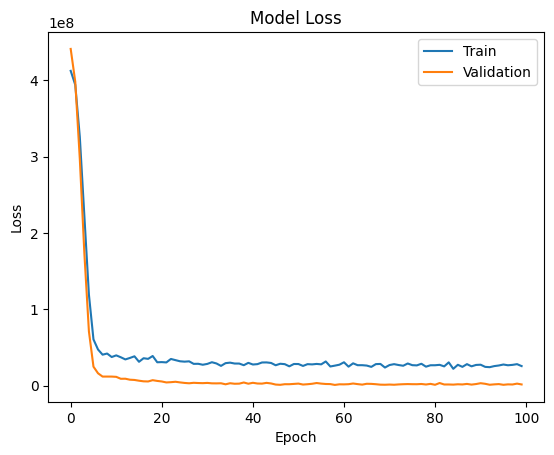

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample data
data = pd.read_csv('./ETH-BTC-USD.csv')

# Create DataFrame
df = pd.DataFrame(data)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Feature and target selection
X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y = df['Close']  # Predicting 'Close' price

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model Creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

# Define the MLP model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot training & validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
